In [1]:
!pip install rdkit-pypi

In [2]:
!pip install Augmentor

In [2]:
!mkdir original_data

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import Augmentor

import os

In [4]:
molecules_smiles = [
    "CCO",            # Methane
    "CC(=O)O",        # Acetic acid
    "CCC(C)C",       # Isopentyne
    "CC#CC(C)C",      # Hexyne
    "CC#CCC(C)C",     # Isohexyne
    "CC(=O)O",        # Acetic acid
    "CC(=O)OC",       # Ethyl acetate
    "CC(=O)OCC",      # Dimethyl ether
    "CC(=O)NC",       # Acetamide
    "CC(=O)NCC",      # Dimethylacetamide
    "CC(C(=O)O)N",    # Glycine
    "CC(C(=O)O)OC",   # Ethyl acetate
    "CC(C(=O)O)OCC",  # Diethyl ether
    "CC(=O)OCCC",     # Triethyl ether
    "CC(=O)OCC(=O)O", # Ethylenedioxy
    "C1=CC=CC=C1",    # Benzene
    "CC(=O)OCC(=O)O", # Diethyl oxalate
    "CC(C)C(=O)O",    # Isobutyric acid
    "CCN(CC)CC",      # Diethylamine
    "CCOCC",          # Diethylene glycol
    "C#CC#CC#C",      # Butadiyne
    "CC(C)C#N",       # Isopropyl cyanide
    "CCOC(=O)C",      # Ethyl formate
    "CCCC",           # Butane
    "CC(C)C",         # Isobutane
    "CCCCC",          # Pentane
    "CC(CC)C",        # Isopentane
    "CCCCCC",         # Hexane
    "CC(C)CC",        # Isohexane
    "CCCCCC(C)C",     # Heptane
    "CC(CC(C)C)C",    # Isooctane
    "CC(CC(C)C)CC",   # Nonane
    "CC#CC",          # Ethyne
    "CC#CCC",         # Propyne
    "CC#CCCC",        # Butyne
    "CC=C",           # Ethene
    "CC=CC",          # Propene
    "CC=CCC",         # Butene
    "CC=C(C)C",       # Isobutene
    "CC=CCCC"         # Pentene
]

opts = Draw.MolDrawOptions()
opts.bondLineWidth = 10
opts.fontBold = True
opts.minFontSize = 30
opts.fontScale = 5

for i, smiles in enumerate(molecules_smiles):
    mol = Chem.MolFromSmiles(smiles)

    # Check if the molecule is valid
    if mol is None:
        print(f"Invalid SMILES for molecule {i + 1}: {smiles}")
        continue

    img = Draw.MolToImage(mol, size = (128, 128), kekulize=False, wedgeBonds=False, options=opts)

    img_path = f'original_data/molecule_{i + 1}.png'

    img.save(img_path)

In [5]:
files = os.listdir('original_data/')

files = [file for file in files if file.lower().endswith('.png')]

images = []

for png_file in files:
    image_path = os.path.join("original_data/", png_file)
    img = Image.open(image_path)
    images.append(img)

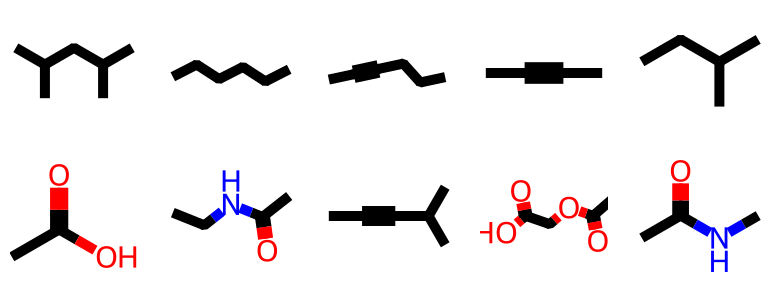

In [6]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (8, 3))

for i in range(10):
    pil_image = images[i]
    ax = axes[i // 5, i % 5]
    ax.imshow(pil_image)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
pipeline = Augmentor.Pipeline('original_data', output_directory = 'augmented_data')

pipeline.rotate(probability = 0.7, max_left_rotation = 10, max_right_rotation = 10)
pipeline.flip_left_right(probability = 0.5)
pipeline.flip_top_bottom(probability = 0.5)
pipeline.zoom_random(probability = 0.5, percentage_area = 0.9)

pipeline.sample(1000)

Initialised with 40 image(s) found.
Output directory set to original_data/augmented_data.

Processing <PIL.Image.Image image mode=RGB size=128x128 at 0x7C3C2DD6FA00>: 100%|██████████| 1000/1000 [00:13<00:00, 74.07 Samples/s]


In [8]:
augmented_dir = 'original_data/augmented_data'

files = [file for file in os.listdir(augmented_dir) if file.lower().endswith('.png')]

for png_file in files:
    image_path = os.path.join(augmented_dir, png_file)
    img = Image.open(image_path)
    images.append(img)


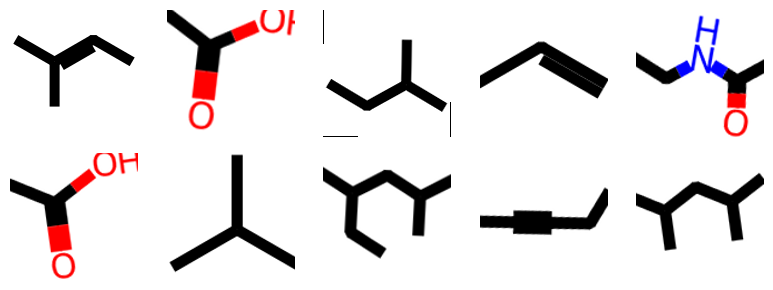

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (8, 3))

for i in range(100, 110):
    pil_image = images[i]
    ax = axes[(i - 100) // 5, (i - 100) % 5]
    ax.imshow(pil_image)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [1]:
!rm -R original_data